Long Short Term Memory

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer # metin verisini sayilara cevirir
from tensorflow.keras.preprocessing.sequence import pad_sequences #dizileri aynı uzunluga getirir
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [17]:
newsgroup = fetch_20newsgroups(subset='all')
print(type(newsgroup))

<class 'sklearn.utils._bunch.Bunch'>


In [18]:

X = newsgroup.data    # metinler
y = newsgroup.target  # metinlere karsılık gelene etiketler

tokenizer = Tokenizer(num_words=10000) # en çok kullanılan kelime sayısı
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X) # metinleri sayılara çevirir
X_padded = pad_sequences(X_sequences, maxlen=100) # dizileri aynı uzunluğa getirir

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)


In [ ]:
def build_lstm_model():
    model = Sequential()

    # input_dim = kelime vektorlerinin toplam boyutu
    # output_dim = her bir kelime vektorunun boyutu
    # input_length = metnin uzunlugu
    model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))

    #lstm katmanı
    # return_sequences = sonuclarin tum zaman adimları yerine sadece son aımda return etmesi
    model.add(LSTM(units=64, return_sequences=False))

    model.add(Dropout(0.5))

    model.add(Dense(units=20, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model
model = build_lstm_model()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=64, callbacks=[early_stopping])


Epoch 1/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.0930 - loss: 2.9051 - val_accuracy: 0.2460 - val_loss: 2.2981
Epoch 2/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.2748 - loss: 2.1430 - val_accuracy: 0.4118 - val_loss: 1.7686
Epoch 3/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4507 - loss: 1.5735 - val_accuracy: 0.5046 - val_loss: 1.5352
Epoch 4/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.5654 - loss: 1.2667 - val_accuracy: 0.5789 - val_loss: 1.2810
Epoch 5/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.6436 - loss: 1.0395 - val_accuracy: 0.5656 - val_loss: 1.3754
Epoch 6/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.7080 - loss: 0.8626 - val_accuracy: 0.6147 - val_loss: 1.1755
Epoch 7/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.7683 - loss: 0.6913 - val_accuracy: 0.6359 - val_loss: 1.1659
Epoch 8/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.8207 - loss: 0.5929 - val_acc

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}, Test loss: {loss:.2f}')

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6698 - loss: 1.2350
Test accuracy: 0.69, Test loss: 1.16


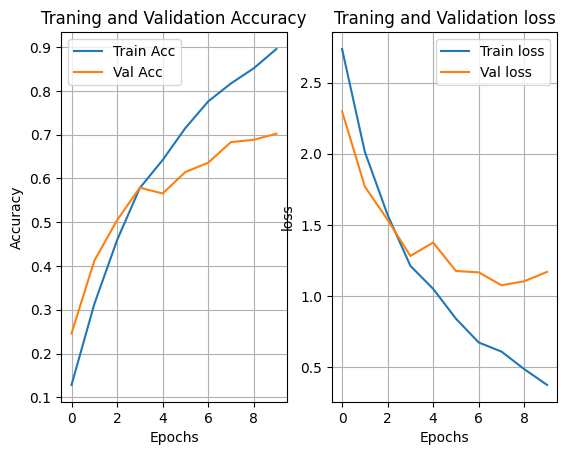

In [22]:
plt.figure()

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Traning and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('True')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title("Traning and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid('True')

In [23]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (64, 100, 64)          │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (64, 64)               │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (64, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (64, 20)               │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,022,974 (7.72 MB)

 Trainable params: 674,324 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,348,650 (5.14 MB)